In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle

folder_path = "../results/Italy_small_epsilon"
filename = "results_1.pickle"

with open(folder_path + "/" + filename, 'rb') as f:
    metrics = pickle.load(f)

In [3]:
import os

folder_path = "../plots/Italy_small_epsilon"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [4]:
mechanisms = ["SH", r"$\text{TDA}_{\ell_2}$", r"$\text{TDA}_{\ell_\infty}$",
              r"$\text{InfTDA}$"]
markers = [["-s", "-*", "-v", "-8", "-P"], ["--s", "--*", "--v", "--8", "--P"]]
colors = plt.cm.viridis(np.linspace(0, 1, len(mechanisms)))  # Generate distinct colors

In [5]:
epsilons = [0.1]
delta = 1E-8
num_experiments = 5

# mechanisms, epsilons, experiments, levels
num_mechanisms = 4

In [6]:
def plot(array, save_to: str = None, name: str = None, log: bool = True, y_label: str = None, ax=None,legend=True):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
    for i, mechanism in enumerate(mechanisms):
        for j, epsilon in enumerate(epsilons):
            # plot error bar line for each level using min max
            error = np.array([np.mean(array[i, j], axis=0) - np.min(array[i, j], axis=0),
                              np.max(array[i, j], axis=0) - np.mean(array[i, j], axis=0)])
            ax.errorbar(range(array[i, j].shape[1]), np.mean(array[i, j], axis=0), yerr=error,
                        label=mechanism + r" $\varepsilon$: " + str(epsilon),
                        fmt=markers[j][i], color=colors[i], capsize=3)
    if log: ax.set_yscale("log")
    # Setting labels and ticks
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel("Levels", fontsize=15) 
    # augment font size
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # Display the plot
    plt.grid(True)
    plt.tight_layout()
    # save a version with no legend
    if save_to is not None and name is not None:
        if os.path.exists(save_to) is False:
            os.makedirs(save_to)
        plt.savefig(os.path.join(save_to, name) + "_nolegend.pdf", dpi=300)
    if legend:
        # Adding a legend
        plt.legend()
        # save
        plt.tight_layout()
        if save_to is not None and name is not None:
            plt.savefig(os.path.join(save_to, name) + ".pdf", dpi=300)
    return ax

In [7]:
def MAE_plot(MAE, std, save_to: str = None, name: str = None, ax=None, legend=True):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
    for i, mechanism in enumerate(mechanisms):
        for j, epsilon in enumerate(epsilons):
            ax.errorbar(range(len(MAE[i, j])), MAE[i, j], yerr=std[i, j],
                        label=mechanism + f" eps: {epsilon}",
                        fmt=markers[j][i], color=colors[i], capsize=3)
    ax.set_yscale("log")
    # Setting labels and ticks
    ax.set_ylabel("Absolute Error", fontsize=15)
    ax.set_xlabel("Levels", fontsize=15)  # Optional: Add an x-label for clarity
    # augment font size in the ax
    ax.tick_params(axis='both', which='major', labelsize=15)
    # Display the plot
    ax.grid(True)
    # save a version with no legend
    if save_to is not None and name is not None:
        if os.path.exists(save_to) is False:
            os.makedirs(save_to)
        plt.savefig(os.path.join(save_to, name) + "_nolegend.pdf", dpi=300)
    if legend:
        # Adding a legend to ax
        plt.legend()
        # save
        if save_to is not None and name is not None:
            plt.tight_layout()
            plt.savefig(os.path.join(save_to, name) + ".pdf", dpi=300)
    return ax

In [8]:
def plot_time(execution_times, save_to: str = None, name: str = None, ax=None):
    # Compute mean, min, and max for each mechanism and epsilon
    mean_times = execution_times.mean(axis=2)
    min_times = execution_times.min(axis=2)
    max_times = execution_times.max(axis=2)
    
    # Compute error bars
    error_bars = [mean_times - min_times, max_times - mean_times]
    
    # Plotting parameters
    colors = plt.cm.viridis(np.linspace(0, 1, len(epsilons)))  # Generate distinct colors
    x_positions = np.arange(len(mechanisms))
    bar_width = 0.3  # Width of each bar

    # Plot
    if ax is None:
        fig, ax =  plt.subplots(figsize=(6, 6))
    for i, epsilon in enumerate(epsilons):
        # Offset the x positions for grouped bars
        positions = x_positions + (i - len(epsilons) / 2) * bar_width
        ax.bar(
            positions,
            mean_times[:, i],
            bar_width,
            yerr=[error_bars[0][:, i], error_bars[1][:, i]],
            capsize=5,
            label=f"$\epsilon$ = {epsilon}",
            color=colors[i],
            edgecolor='black',
            linewidth=1,
            # add color to errorbars
            error_kw=dict(ecolor='red', lw=1, capsize=8, capthick=2)
        )
    
    # Set x-ticks at the center of each group
    x_ticks_positions = np.arange(len(mechanisms)) - 0.15
    plt.xticks(x_ticks_positions, mechanisms)
    # augment font size
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    ax.set_ylabel("Execution Time (s)", fontsize=15)
    ax.set_xlabel("Optimization", fontsize=15)
    # plt.title("Execution Time by Mechanism and Epsilon")
    plt.tight_layout()

    if save_to is not None and name is not None:
        if os.path.exists(save_to) is False:
            os.makedirs(save_to)
        plt.savefig(os.path.join(save_to, name) + "_nolegend.pdf", dpi=300)
    plt.legend(title="Epsilon")
    
    plt.tight_layout()
    if save_to is not None and name is not None:
        plt.savefig(os.path.join(save_to, name) + ".pdf", dpi=300)
    return ax

 ## Maximum Absolute Error per Level

In [9]:
metrics_to_plot = metrics
save_to = "../plots/Italy_small_epsilon/"

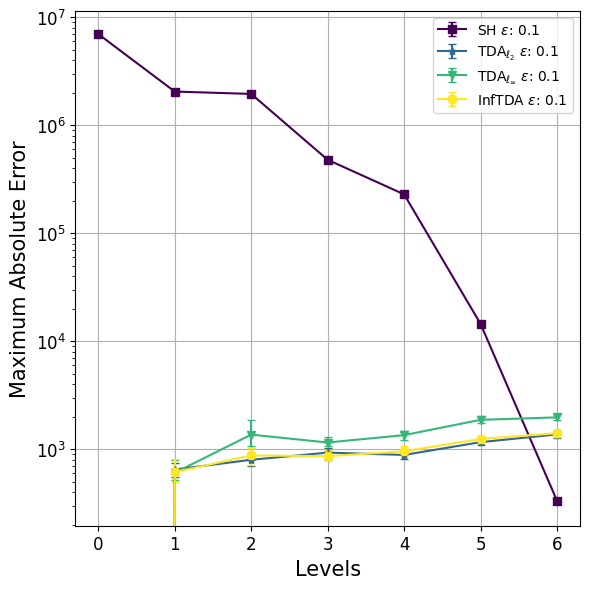

In [10]:
plot(metrics_to_plot["max_error"], y_label="Maximum Absolute Error", log=True, save_to=save_to, name="max_error")
plt.show()

## Mean Absolute Error per Level

<Axes: xlabel='Levels', ylabel='Absolute Error'>

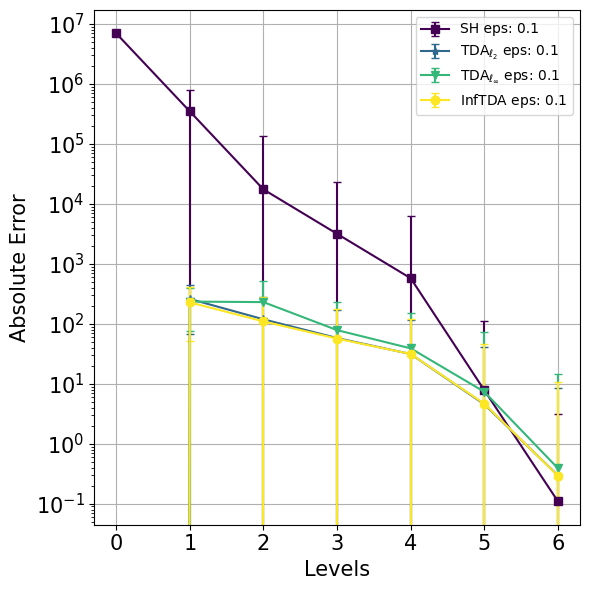

In [11]:
MAE_plot(metrics_to_plot["MAE"], metrics_to_plot["std"], save_to=save_to, name="MAE")

## False Discovery Rate

<Axes: xlabel='Levels', ylabel='False Discovery Rate'>

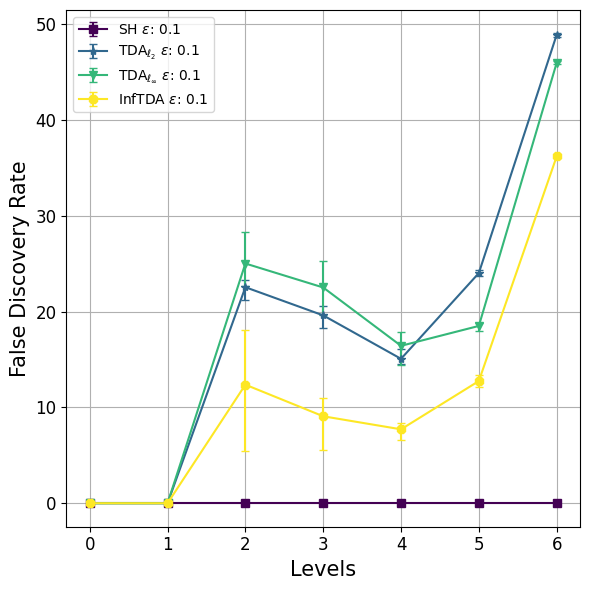

In [12]:
plot(metrics_to_plot["false_discovery_rate"], y_label="False Discovery Rate", log=False, save_to=save_to, name="false_discovery_rate")

## False Negative Rate

<Axes: xlabel='Levels', ylabel='False Negative Rate'>

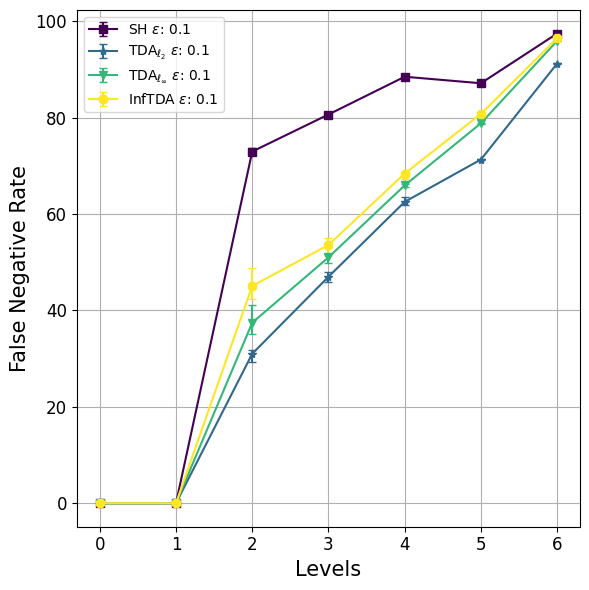

In [13]:
plot(metrics_to_plot["false_negative_rate"], y_label="False Negative Rate", log=False, save_to=save_to, name="false_negative_rate")

## Time

<Axes: xlabel='Optimization', ylabel='Execution Time (s)'>

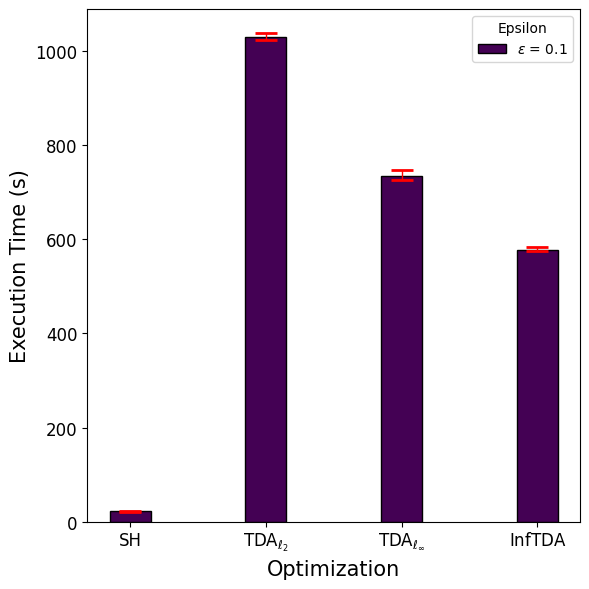

In [14]:
plot_time(metrics_to_plot["TIME"], save_to=save_to, name="time")

# All plots

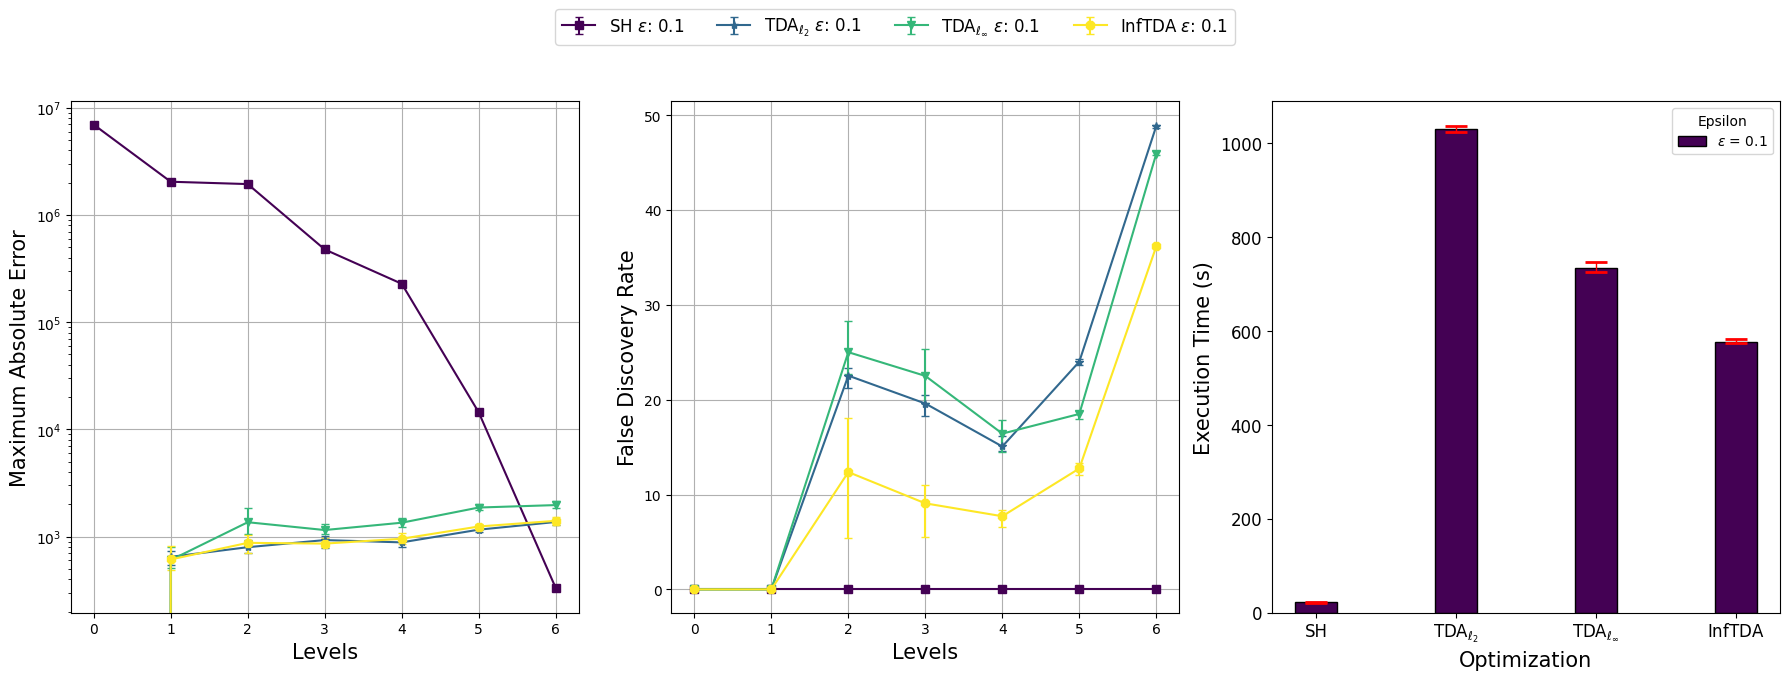

In [15]:
# generate three plots in a row
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
# Maximum Absolute Error
plot(metrics_to_plot["max_error"], y_label="Maximum Absolute Error", log=True, ax=axs[0], legend=False)
# false discovery rate
plot(metrics_to_plot["false_discovery_rate"], y_label="False Discovery Rate", log=False, ax=axs[1], legend=False)
# Time
plot_time(metrics_to_plot["TIME"], ax=axs[2])
# set the grid on the first two plots
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(False)
# Ottieni la legenda esistente dal primo subplot
handles, labels = axs[0].get_legend_handles_labels()

# Aggiungi la legenda sopra il plot, con 6 colonne
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=4, fontsize=12)

# save also the legend
fig.savefig(os.path.join(save_to, "all_plots.pdf"), dpi=300,bbox_inches='tight')

plt.show()